# NetworkX

[NetworkX](https://networkx.github.io/) is a Python library for doing in-memory graph analysis.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

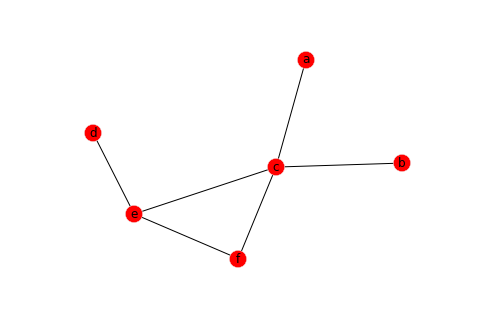

In [2]:
# A SIMPLE EXAMPLE

G=nx.Graph()

G.add_node("a")
G.add_node("b")
G.add_node("c")
G.add_node("d")
G.add_node("e")
G.add_node("f")

G.add_edge('a', 'c')
G.add_edge('b', 'c')
G.add_edge('e', 'd')
G.add_edge('c', 'e')
G.add_edge('e', 'f')
G.add_edge('c', 'f')

pos=nx.spring_layout(G)
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

In [3]:
# SOME FAKE DATA

locations =['Large Warehouse', 'Small Warehouse'
 , 'Retail 1', 'Retail 2', 'Retail 3', 'Retail 4'
 , 'Supplier 1', 'Supplier 2', 'Supplier 3']

adjacency = [
      [   0, 1500,  100,  275, 1600, 1750,  500,  130, 1550] #Large Warehouse'
    , [  -1,    0, 1475, 1600,  400,   50,  500, 1800,  100] #Small Warehouse'
    , [  -1,   -1,    0,  300, 1750, 1600, 9999, 9999, 9999] #Retail 1
    , [  -1,   -1,   -1,    0, 1840, 1900, 9999, 9999, 9999] #Retail 2
    , [  -1,   -1,   -1,   -1,    0,  650, 9999, 9999, 9999] #Retail 3
    , [  -1,   -1,   -1,   -1,   -1,    0, 9999, 9999, 9999] #Retail 4
    , [  -1,   -1,   -1,   -1,   -1,   -1,    0,  400,  700] #Supplier 1
    , [  -1,   -1,   -1,   -1,   -1,   -1,   -1,    0, 1900] #Supplier 2
    , [  -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1, 1775] #Supplier 3
]

In [4]:
# CONVERT THAT FAKE DATA INTO A GRAPH

g = nx.Graph()

for loc in locations:
    g.add_node(loc)

for i in range(len(locations)):
    r = locations[i]
    row = adjacency[i]
    for j in range (i+1, len(locations)):
        c = locations[j]
        val = row[j]
        if val > 0 and val < 9999:
            g.add_edge(r, c, miles=val)

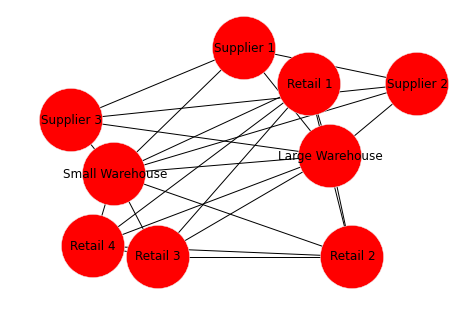

In [5]:
# VISUALIZE OUR DATASET

pos={'Large Warehouse': [ 7,  2],
     'Small Warehouse': [ 2,  1.75],
     'Retail 1':        [ 6.5,  3],
     'Retail 2':        [ 7.5,  .6],
     'Retail 3':        [ 3,  .6],
     'Retail 4':        [ 1.5,  0.75],
     'Supplier 1':      [ 5,  3.5],
     'Supplier 2':      [ 9,  3],
     'Supplier 3':      [ 1,  2.5 ]}
nx.draw(g, pos=pos, node_size=4000)
nx.draw_networkx_labels(g, pos=pos)
plt.show()

In [6]:
# WHAT IS THE SHORTEST ROUTE TO TRANSPORT FROM SUPPLIER 1 TO RETAIL 3?

nx.dijkstra_path(g, source='Supplier 1', target='Retail 3', weight='miles')

['Supplier 1', 'Small Warehouse', 'Retail 3']

# Implicit node creation on edge add: a "gotcha" / feature of note

In [7]:
print g.nodes()
g.add_edge('Supplier 1', 'Retail 5')
print g.nodes()

['Supplier 1', 'Small Warehouse', 'Supplier 2', 'Supplier 3', 'Large Warehouse', 'Retail 4', 'Retail 1', 'Retail 3', 'Retail 2']
['Supplier 1', 'Small Warehouse', 'Supplier 2', 'Supplier 3', 'Large Warehouse', 'Retail 5', 'Retail 4', 'Retail 1', 'Retail 3', 'Retail 2']


# Just a touch of computational theory

##Dijkstra's algorithm
* Finds the shortest path between a source node and all other nodes

Time complexity: $O(|E| + |V|\text{log}|V|)$

## A* search algorithm
* Extends Dijkstra adding in some heuristics

Time complexity: $O(|E|)$

##Johnson's algorithm
* Finds all pairs of shortest paths in a weighted graph
* An extension of Dijkstra (sort of)
* An impressive algorithm

Time complexity: $O(|V|^2 \text{log}|V| + |V||E|$

##Floyd-Warshall algorithm
* Finds all pairs of shortest paths in a weighted graph
* Allows negative edges, but no negative cycles
* Better with highly dense graphs

Time complexity: $O(|V|^3)$

Space complexity: $\Theta(|V|^2)$

In [8]:
ap = nx.floyd_warshall(g, weight='miles')
print(ap['Supplier 3'])


defaultdict(<function <lambda> at 0x7f62a97a5f50>, {'Large Warehouse': 1100, 'Supplier 2': 1000, 'Supplier 3': 0, 'Supplier 1': 600, 'Small Warehouse': 100, 'Retail 5': 601.0, 'Retail 4': 150, 'Retail 1': 1200, 'Retail 3': 500, 'Retail 2': 1375})


# Uses for NetworkX in Data Science
* Related products
* Supply chain optimization
* Social graph
* Internet topology